##**AdaBoost Algorithm**





**Data preparation**

In [ ]:
#load data
import pandas as pd
df=pd.read_csv('/content/sample_data/data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
df.shape

(6819, 96)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
#Rename the target variable column
df.rename(columns={"Bankrupt?":"Bankrupt"},inplace=True)

In [ ]:
#select independent variables
features=df.columns[1:]
X=df[features]
X.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
#select dependent variable
y=df['Bankrupt']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Bankrupt, dtype: int64

**Multicolinearity**

In [ ]:
#check correlation
cor_matrix=df.corr().abs()
cor_matrix

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt,1.000000,0.260807,0.282941,0.273051,0.100043,0.099445,0.000230,0.008517,0.008857,0.016593,...,0.315457,0.035104,0.005547,0.100044,0.180987,0.166812,0.010508,0.005509,NaN,0.083048
ROA(C) before interest and depreciation before interest,0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,0.071725,0.008135,0.334721,0.274287,0.143629,0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,0.098900,0.011463,0.326971,0.291744,0.141039,0.011515,0.013372,NaN,0.057887
ROA(B) before interest and depreciation after tax,0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,0.089088,0.007523,0.333750,0.280617,0.142838,0.014663,0.011473,NaN,0.056430
Operating Gross Margin,0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.300143,0.022672,0.004205,1.000000,0.075304,0.085434,0.011806,0.001167,NaN,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.166812,0.143629,0.141039,0.142838,0.085434,0.085407,0.001541,0.004043,0.004390,0.011899,...,0.159697,0.021982,0.003724,0.085434,0.791836,1.000000,0.002119,0.001487,NaN,0.159654
Degree of Financial Leverage (DFL),0.010508,0.016575,0.011515,0.014663,0.011806,0.011268,0.000935,0.000855,0.000927,0.000556,...,0.010463,0.001881,0.008812,0.011806,0.000093,0.002119,1.000000,0.016513,NaN,0.016739
Interest Coverage Ratio (Interest expense to EBIT),0.005509,0.010573,0.013372,0.011473,0.001167,0.001158,0.000393,0.000984,0.000957,0.001024,...,0.012746,0.000239,0.001027,0.001169,0.005147,0.001487,0.016513,1.000000,NaN,0.008339
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Dropping highly correlated columns among independent variables
import numpy as np
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

dropped_cols = set()
for feature in upper_tri.columns:
    if any(upper_tri[feature] > 0.9): #more than 0.9 corr. coeficient -> dropped
        dropped_cols.add(feature)

print("There are %d dropped columns" %len(dropped_cols))

X = X.drop(dropped_cols,axis=1)
X.head()

There are 19 dropped columns


<ipython-input-21-65c97bd6c575>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,...,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,1,0.016469
1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,...,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,1,0.020794
2,0.426071,0.601450,0.998857,0.302035,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,...,0.314515,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706,1,0.016474
3,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.0,0.465705,0.000449,0.0,0.154187,...,0.302382,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663,1,0.023982
4,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,0.167502,...,0.311567,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617,1,0.035490


**Data distribution**

In [22]:
df['Bankrupt'].value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

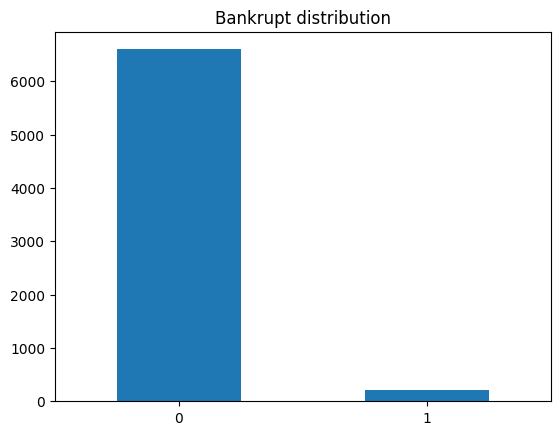

Bankrupt Distribution

0    6599
1     220
Name: Bankrupt, dtype: int64


In [23]:
import matplotlib.pyplot as plt

df['Bankrupt'].value_counts().plot.bar(y='Bankrupt?', rot=0)
plt.title("Bankrupt distribution")
plt.show()
print("Bankrupt Distribution\n")
print(df['Bankrupt'].value_counts())

 from the distribution we can observe the class imbalance, needs to be treated before modelling.

In [24]:
# Lets oversample our dataset using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)
y_resampled.value_counts()


1    6599
0    6599
Name: Bankrupt, dtype: int64

**Feature Selection**

In [25]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier
sfm=SelectFromModel(AdaBoostClassifier()).fit(X_resampled,y_resampled)

In [26]:
selected_features=sfm.get_feature_names_out()
selected_features

array([' ROA(C) before interest and depreciation before interest',
       ' Non-industry income and expenditure/revenue',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Persistent EPS in the Last Four Seasons',
       ' Operating Profit Growth Rate',
       ' After-tax Net Profit Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Quick Ratio',
       ' Total debt/Total net worth',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth', ' Average Collection Days',
       ' Inventory Turnover Rate (times)',
       ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnover Rate (times)', ' Revenue per person',
       ' Operating profit per person', ' Allocation rate per person',
       ' Quick Assets/Total Assets', ' Cash/Current Liability',
       ' Current Liabilities/Liability',
       ' Lo

In [31]:
len(selected_features)

35

In [33]:
len(X_resampled.columns)

76

consider only feature selected columns and assign it to independent variable X

In [35]:
X=X_resampled[[' ROA(C) before interest and depreciation before interest',
       ' Non-industry income and expenditure/revenue',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Persistent EPS in the Last Four Seasons',
       ' Operating Profit Growth Rate',
       ' After-tax Net Profit Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Quick Ratio',
       ' Total debt/Total net worth',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth', ' Average Collection Days',
       ' Inventory Turnover Rate (times)',
       ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnover Rate (times)', ' Revenue per person',
       ' Operating profit per person', ' Allocation rate per person',
       ' Quick Assets/Total Assets', ' Cash/Current Liability',
       ' Current Liabilities/Liability',
       ' Long-term Liability to Current Assets',
       ' Retained Earnings to Total Assets',
       ' Total income/Total expense', ' Current Asset Turnover Rate',
       ' Cash Turnover Rate', ' Cash Flow to Total Assets',
       ' Cash Flow to Liability', " Net Income to Stockholder's Equity",
       ' Degree of Financial Leverage (DFL)']]
X.head()

,ROA(C) before interest and depreciation before interest,Non-industry income and expenditure/revenue,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Persistent EPS in the Last Four Seasons,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Net Value Growth Rate,...,Current Liabilities/Liability,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Current Asset Turnover Rate,Cash Turnover Rate,Cash Flow to Total Assets,Cash Flow to Liability,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL)
0,0.370594,0.302646,0.0,0.458143,0.000725,0.0,0.169141,0.848195,0.688979,0.000327,...,0.676269,0.025592,0.903225,0.002022,7.010000e+08,4.580000e+08,0.637555,0.458609,0.827890,0.026601
1,0.464291,0.303556,0.0,0.461867,0.000647,0.0,0.208944,0.848088,0.689693,0.000443,...,0.308589,0.023947,0.931065,0.002226,1.065198e-04,2.490000e+09,0.641100,0.459001,0.839969,0.264577
2,0.426071,0.302035,25500000.0,0.458521,0.000790,0.0,0.180581,0.848094,0.689463,0.000396,...,0.446027,0.003715,0.909903,0.002060,1.791094e-03,7.610000e+08,0.642765,0.459254,0.836774,0.026555
3,0.399844,0.303350,0.0,0.465705,0.000449,0.0,0.193722,0.848005,0.689110,0.000382,...,0.615848,0.022165,0.906902,0.001831,8.140000e+09,2.030000e+09,0.579039,0.448518,0.834697,0.026697
4,0.465022,0.303475,0.0,0.462746,0.000686,0.0,0.212537,0.848258,0.689697,0.000439,...,0.975007,0.000000,0.913850,0.002224,6.680000e+09,8.240000e+08,0.622374,0.454411,0.839973,0.024752


In [36]:
y=y_resampled
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Bankrupt, dtype: int64

**Train_test_split**

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
#Standardisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_sc= sc.transform(X_train)
X_test_sc= sc.transform(X_test)

**Model selection**

In [39]:
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(n_estimators=100,random_state=0)
clf.fit(X_train_sc,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

**Evaluate model performance**

In [40]:
clf.score(X_test_sc,y_test)

0.934469696969697

In [41]:
clf.score(X_train_sc,y_train)

0.9495169539685546

In [43]:
y_pred=clf.predict(X_test_sc)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.934469696969697

In [42]:
#check precision, recall, f1-score from classification_report
from sklearn.metrics import classification_report
y_pred=clf.predict(X_test_sc)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1315
           1       0.94      0.93      0.93      1325

    accuracy                           0.93      2640
   macro avg       0.93      0.93      0.93      2640
weighted avg       0.93      0.93      0.93      2640



In [45]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[1238,   77],
       [  96, 1229]])

**Hyperparameter tuning**

In [46]:
paras={'n_estimators':[10,50,100],
       'learning_rate':[0.0,1.0,5.0],
       'random_state':[0,10,35,42]
       }

In [47]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(AdaBoostClassifier(), paras)
grid_search.fit(X_train_sc,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py", line 124, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.0, 1.0, 5.0],
                         'n_estimators': [10, 50, 100],
                         'random_state': [0, 10, 35, 42]})

In [48]:
grid_search.best_params_

{'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 0}

In [49]:
gdcv=AdaBoostClassifier(learning_rate=1.0, n_estimators=100, random_state=0)
gdcv.fit(X_train_sc,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [50]:
y_pred=gdcv.predict(X_test_sc)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [52]:
gdcv.score(X_test_sc,y_test)

0.934469696969697

Even after fine tuning the model score is same ie, 0.934469696969697